In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.metrics import *
import tensorflow as tf

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


### Data Preprocessing

In [3]:
df_1 = df.drop(columns=["Unnamed: 0"])
df_1.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [4]:
(df_1.isna().sum() * 100 / len(df_1)).round(2)

cut                             0.00
color                           0.00
clarity                         0.00
carat_weight                    0.00
cut_quality                     0.00
lab                             0.00
symmetry                        0.00
polish                          0.00
eye_clean                       0.00
culet_size                      0.00
culet_condition                 0.00
depth_percent                   0.00
table_percent                   0.00
meas_length                     0.00
meas_width                      0.00
meas_depth                      0.00
girdle_min                      0.00
girdle_max                      0.00
fluor_color                     0.00
fluor_intensity                65.31
fancy_color_dominant_color      0.00
fancy_color_secondary_color     0.00
fancy_color_overtone            0.75
fancy_color_intensity           0.00
total_sales_price               0.00
dtype: float64

In [5]:
(df_1.duplicated().sum() * 100 / len(df_1)).round(2)

1.77

In [6]:
df_2 = df_1.drop_duplicates()
pp = df_2.isna().sum()
pp[pp>0]

fluor_intensity         140711
fancy_color_overtone      1630
dtype: int64

In [7]:
df_2["fluor_intensity"].unique()

array([nan, 'Very Slight', 'Strong', 'Medium', 'Faint', 'Very Strong',
       'unknown', 'Slight'], dtype=object)

In [8]:
df_2["fancy_color_overtone"].unique()

array(['unknown', nan, 'Yellowish', 'Brownish', 'Pinkish', 'Greenish',
       'Orangey', 'Purplish', 'Grayish'], dtype=object)

In [9]:
df_3 = df_2.copy()
df_3["fluor_intensity"] = df_3["fluor_intensity"].fillna("unknown")
df_3["fancy_color_overtone"] = df_3["fancy_color_overtone"].fillna("unknown")
df_3.isna().sum().sum()

0

In [19]:
data_types = df_3.dtypes
object_columns = data_types[data_types == "object"].index.values
numeric_columns = data_types[data_types != "object"].index.values[:-1]
print("Object Columns  : ",object_columns)
print()
print("Numeric Columns : ",numeric_columns)

Object Columns  :  ['cut' 'color' 'clarity' 'cut_quality' 'lab' 'symmetry' 'polish'
 'eye_clean' 'culet_size' 'culet_condition' 'girdle_min' 'girdle_max'
 'fluor_color' 'fluor_intensity' 'fancy_color_dominant_color'
 'fancy_color_secondary_color' 'fancy_color_overtone'
 'fancy_color_intensity']

Numeric Columns :  ['carat_weight' 'depth_percent' 'table_percent' 'meas_length' 'meas_width'
 'meas_depth']


In [26]:
df_4 = df_3.copy()
le = LabelEncoder()
for i in object_columns:
    column_values = le.fit_transform(df_3[i])
    df_4[i] = column_values.copy()

In [27]:
df_4

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,6,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,6,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,6,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,6,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,6,12,10,7,9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,0,4,3,...,8.66,0,1,5,6,12,10,7,9,1210692
219699,9,10,8,5.17,5,0,4,4,4,8,...,5.71,3,7,5,6,5,10,7,5,1292500
219700,10,1,7,18.07,0,0,0,0,4,3,...,10.20,4,0,5,6,12,10,7,9,1315496
219701,8,10,5,0.90,5,0,2,2,4,3,...,3.47,8,5,5,0,10,10,7,1,1350000


### Outlier Detection

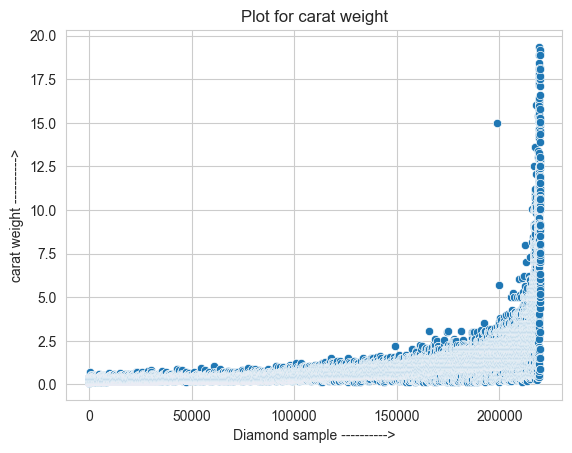

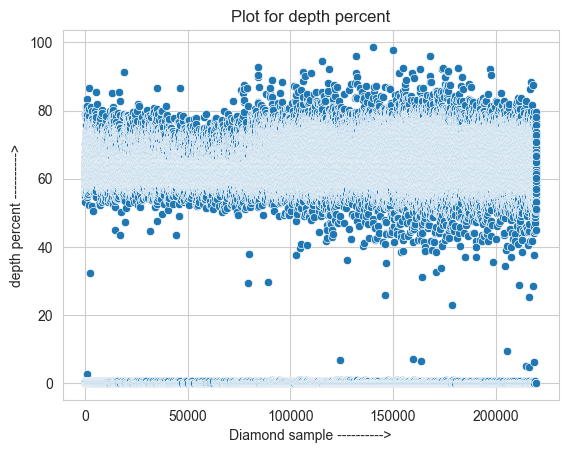

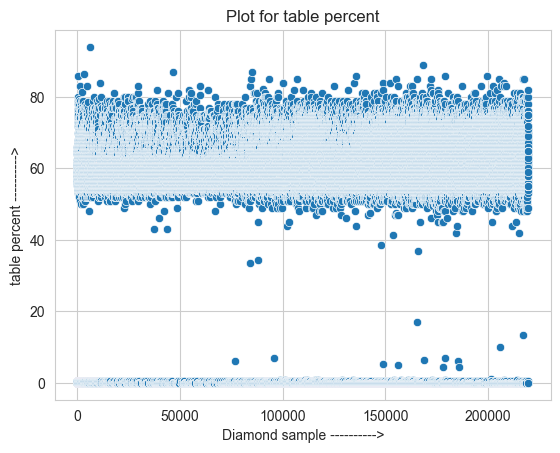

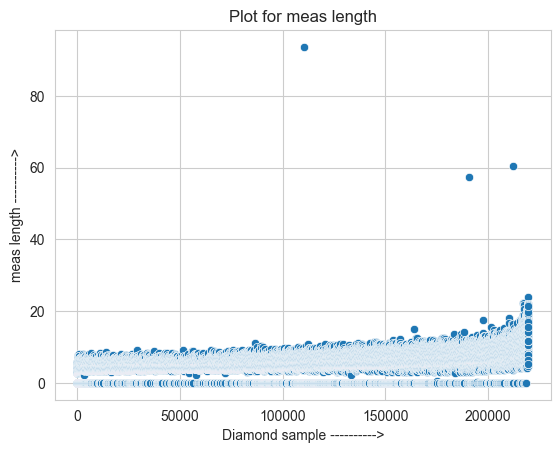

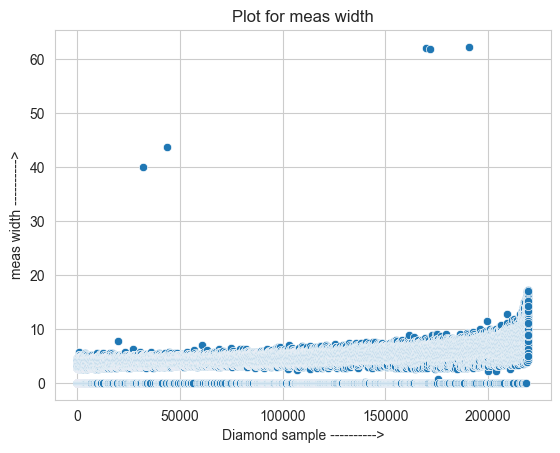

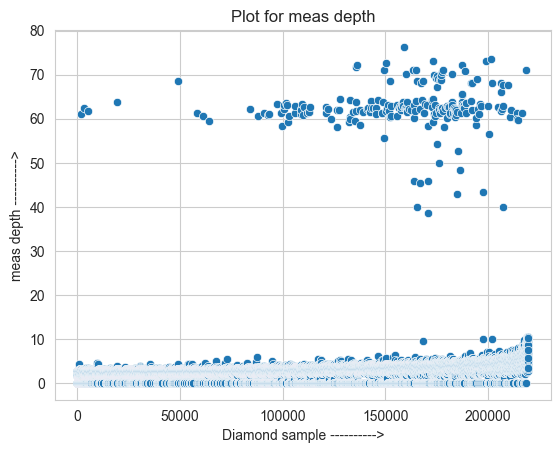

In [30]:
for i in numeric_columns:
    sns.scatterplot(data=df_4[i])
    plt.title("Plot for "+i.replace("_"," "))
    plt.xlabel("Diamond sample ---------->")
    plt.ylabel(i.replace("_"," ")+" ---------->")
    plt.show()